In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter

# Load the dataset
file_path = '/workspaces/fdap-2024-chintan-wadhwa/duesseldorf_listings_no_description.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(df.head())

# Data Cleaning
# Remove leading/trailing whitespace from column names
df.columns = df.columns.str.strip()


                                           full_link  \
0  https://www.wg-gesucht.de/en/wg-zimmer-in-Dues...   
1  https://www.wg-gesucht.de/en/wg-zimmer-in-Dues...   
2  https://www.wg-gesucht.de/en/wg-zimmer-in-Dues...   
3  https://www.wg-gesucht.de/en/wg-zimmer-in-Dues...   
4  https://www.wg-gesucht.de/en/wg-zimmer-in-Dues...   

                                               title  \
0  Internationals welcome. Fully equipped in kitc...   
1  Ab 1.Oktober oder später  2er WG  Zimmer in De...   
2  Schönes möbliertes WG  Zimmer -  nah an Düssel...   
3  Helles WG Zimmer in ruhiger 5er WG frei ab 01....   
4         Berufstätigen -WG im ÖkoPH mit viel Garten   

                                             details  price  \
0  2 person apartment share  \n                  ...  650 €   
1  2 person apartment share  \n                  ...  750 €   
2  2 person apartment share  \n                  ...  560 €   
3  5 person apartment share  \n                  ...  542 €   
4  3 person

In [9]:
# Convert 'price' and 'size' to numeric values
df['price'] = df['price'].str.replace('€', '').str.replace(',', '').astype(float)
df['size'] = df['size'].str.replace('m²', '').astype(float)

# Convert 'availability' to datetime
df['availability'] = pd.to_datetime(df['availability'], errors='coerce', format='%d.%m.%Y')

# Handle missing values
df = df.dropna(subset=['price', 'size', 'availability'])

AttributeError: Can only use .str accessor with string values!

In [4]:
# Basic Data Analysis
# Descriptive statistics
price_stats = df['price'].describe()
size_stats = df['size'].describe()
availability_stats = df['availability'].describe()

print("Price Statistics:")
print(price_stats)
print("\nSize Statistics:")
print(size_stats)
print("\nAvailability Statistics:")
print(availability_stats)

# Average price per square meter
df['price_per_sqm'] = df['price'] / df['size']
avg_price_per_sqm = df['price_per_sqm'].mean()
print(f"\nAverage Price per Square Meter: {avg_price_per_sqm:.2f} €")

Price Statistics:
count     31.000000
mean     571.064516
std      126.178692
min      294.000000
25%      492.500000
50%      589.000000
75%      632.500000
max      995.000000
Name: price, dtype: float64

Size Statistics:
count    31.000000
mean     19.258065
std      11.518008
min      10.000000
25%      15.000000
50%      16.000000
75%      19.500000
max      61.000000
Name: size, dtype: float64

Availability Statistics:
count                               31
mean     2024-07-25 10:03:52.258064640
min                2024-06-25 00:00:00
25%                2024-07-01 00:00:00
50%                2024-08-01 00:00:00
75%                2024-08-01 00:00:00
max                2024-10-01 00:00:00
Name: availability, dtype: object

Average Price per Square Meter: 33.80 €


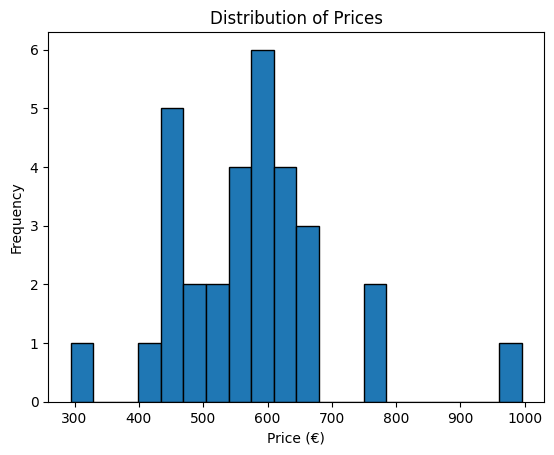

In [5]:
# Distribution of prices
import matplotlib.pyplot as plt

plt.hist(df['price'], bins=20, edgecolor='black')
plt.title('Distribution of Prices')
plt.xlabel('Price (€)')
plt.ylabel('Frequency')
plt.show()

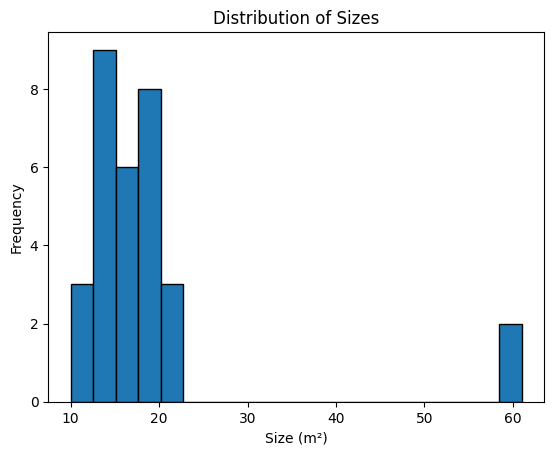

In [6]:
# Distribution of sizes
plt.hist(df['size'], bins=20, edgecolor='black')
plt.title('Distribution of Sizes')
plt.xlabel('Size (m²)')
plt.ylabel('Frequency')
plt.show()


In [7]:
# Correlation between price and size
correlation = df[['price', 'size']].corr()
print("\nCorrelation between Price and Size:")
print(correlation)

# Save the cleaned dataset
df.to_csv('cleaned_wg_gesucht_duesseldorf.csv', index=False)


Correlation between Price and Size:
          price      size
price  1.000000  0.128658
size   0.128658  1.000000


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/codespace/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


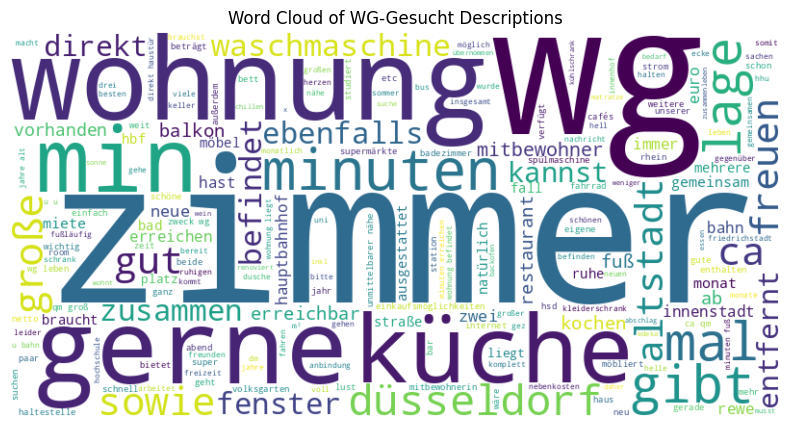

In [14]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter

# Download the stopwords if not already downloaded
nltk.download('stopwords')
nltk.download('punkt')

# Fill missing descriptions with a placeholder
df['description'] = df['description'].fillna('No description available')

# Text Preprocessing Function
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove punctuation
    text = re.sub(r'\W+', ' ', text)
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove stopwords
    stop_words = set(stopwords.words('english')).union(set(stopwords.words('german')))
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word not in stop_words]
    return ' '.join(filtered_text)

# Apply preprocessing to the description column
df['cleaned_description'] = df['description'].apply(preprocess_text)

# Generate a Word Cloud
all_descriptions = ' '.join(df['cleaned_description'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_descriptions)

# Plot the Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of WG-Gesucht Descriptions')
plt.show()

In [15]:
# Tokenize words for further analysis
all_words = word_tokenize(all_descriptions)

# Frequency Distribution of Words
word_freq = Counter(all_words)
common_words = word_freq.most_common(20)

# Display common words
print("Most Common Words in Descriptions:")
for word, freq in common_words:
    print(f"{word}: {freq}")

# Save the cleaned dataset
df.to_csv('cleaned_wg_gesucht_duesseldorf_with_descriptions.csv', index=False)

Most Common Words in Descriptions:
zimmer: 98
wg: 90
wohnung: 78
gerne: 57
minuten: 53
min: 43
küche: 41
ca: 34
direkt: 32
mal: 30
gibt: 29
befindet: 28
lage: 27
u: 27
fuß: 25
qm: 24
sowie: 23
bahn: 23
kannst: 22
kochen: 22
